In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from scipy.fftpack import fft, fftfreq
from time import time

from IPython.display import Image  


from matplotlib import animation
from IPython.display import HTML

%matplotlib inline
#%matplotlib notebook
params = {'legend.fontsize': 14,
          'figure.figsize': (8, 8),
         'axes.labelsize': 14,
         'axes.titlesize': 14,
         'xtick.labelsize':14,
         'ytick.labelsize':14}

plt.rcParams.update(params) 

# Descriminador de Foster-Seeley. 



Un discriminador de Foster-Seeley (a veces llamado un discriminador de desplazamiento de la fase) es un discriminador de frecuencia de circuito sintonizado, cuya operación es muy similar a la de un detector de pendiente balanceado. 

El circuito de Foster-Seeley funciona con una diferencia de fase entre las señales. 

![ex 2.13](FosterSeeley_r1.png)

Para las señales de distintas fases, se realiza una conexión en el lado primario del transformador, utilizando un capacitor, y esto se lleva al área central del transformador. 
Esto produce un defasaje de la señal que es $90$ grados.

Cuando una portadora no modulada es aplicada en la frecuencia central, ambos diodos conducen para producir tensiones iguales y opuestas en sus respectivas resistencias de carga. 

Estas tensiones se anulan entre sí en la salida de manera que no hay tensión. 

A medida que la portadora se mueve en frecuencia, la condición de equilibrio de la frecuencia central pierde, y un diodo conduce más que el otro.

Resultando entonces una incremento de la corriente a través de las resistencias siendo un voltaje mayor
que otro, además de una tensión resultante en la salida correspondiente a la
modulación de la señal de entrada. 

Es decir, transforma las frecuencias mayores a la fc en voltajes positivos, y a su vez las frecuencias menores a la fc las transforma en voltajes negativos. 

![ex 2.13](FosterSeeley_r2.png)




El diagrama esquemático para un discriminador de Foster-Seeley se muestra en la figura. 
El valor de la capacidades para $C_8$ se elige para que sean cortocircuitos para la frecuencia central IF y $C_1$ y $C_2$ estan en resonancia con los inductores $L_1$, y $L_2$   

Por lo tanto, el lado derecho de $L_3$, está en el potencial a tierra en ca, la señal de IF ($V_{entrada}$) se alimenta directamente (en fase), a través de $L_3$ ($V_{L_3}$). 

La IF que está entrando se invierte $180$ por el transformador $T$, y se divide igualmente entre $L_a$ y $L_b$ En la frecuencia resonante del circuito tanque secundario (la frecuencia central de IF), la corriente secundaria ($I_s$) está en fase, con el voltaje secundario total ($V$) y $180$ fuera de fase con $V_{L_3}$ 

Además, debido a la viculación debil, el primario de $T$ actúa como un inductor y la corriente principal
$I_p$ esta $90$ fuera de fase con $V_{entrada}$, y, debido a que la inducción magnética depende de la corriente primaria, el voltaje inducido en el secundario está $90$ fuera de fase con $V_{entrada}(V_{L_3})$.
Por lo tanto, $V_{L_a}$ y $V_{L_b}$ están $180$ fuera de fase, uno con otro, y en cuadratura, o $90$, fuera de fase con $V_{L_3}$. 

El voltaje a través del diodo superior ($V_{D_1}$ )es la suma vectorial de $V_{L_3}$ y VLa y el voltaje a través del diodo inferior $V_{D_2}$ es la suma del vector de $V_{L_3}$ y $V_{L_b}$. 

Los diagramas del vector correspondientes se muestran en la figura. 
La figura muestra que los voltajes a través de $D_1$,y $D_2$ son iguales. 
Por lo tanto, en la resonancia, $I_1$ y $I_2$ son iguales y C, y C se cargan a voltajes de magnitud iguales, excepto que con polaridades opuestas. 

Consecuentemente, $V_{salida} = V_{c1} - V_{c2}= 0 V$. 
Cuando la IF sube por arriba de la resonancia ($X_L > X_C$), la impedancia del circuito tanque secundario se convierte en inductiva y la corriente secundaria se atrasa al voltaje secundario por un ángulo 0, lo cual es proporcional a la magnitud de la desviación de frecuencia. 


La figura muestra que la suma vectorial del voltaje a través de D1 es mayor a la suma vectorial de los voltajes a través de $D_2$. 

C, se carga, mientras que $C_2$ descarga y Vsalida se hace positivo. Cuando la IF baja, la resonancia (XL < Xc), la corriente secundaria se adelanta al
voltaje secundario por algún ángulo 0, el cual es, de nuevo, proporcional a la magnitud del cambio en frecuencia. 
Los fasores correspondientes se muestran en la figura. Puede observarse que la suma vectorial de los voltajes, a través de D1 es ahora menor que la suma vectorial de los voltajes, a través de D2. Consecuentemente, C1 descarga mientras que C2 carga y Vsalida se hace negativo. Un discriminador de Foster-Seeley se sintoniza inyectando una frecuencia igual a la frecuencia central IF y sintonizando Co a 0 V la salida.

En el análisis anterior y en la figura 7-4 se muestra que el voltaje de salida de un discriminador de Foster-Seeley, es directamente proporcional a la magnitud y dirección de la desviación de frecuencia. La figura 7-5 muestra una típica curva de respuesta de voltaje contra frecuencia para un discriminador de Foster-Seeley. 

Por razones obvias, se llama frecuentemente una curva S. 
Puede observarse que la curva de desviación de voltaje contra frecuencia de salida es más lineal que la de un detector de pendiente y debido a que sólo hay un circuito tanque, es más fácil de sintonizar.

Para la demodulación sin distorsión, la desviación de frecuencia debe restringirse a la porción lineal de la curva de respuesta de la frecuencia sintonizada del circuito secundario. Como el detector de pendiente, un discriminador de Foster-Seeley responde a la amplitud, así como a las variaciones de la frecuencia, por lo tanto, le debe preceder a un circuito limitador separado.




![ex 2.13](FosterSeeley_avec.png)


## Analisis



![ex 2.13](FosterSeeley_b.png)

# 


------
$v_i =  i_1 (SL_1)  + i_2 (-SM)$


$0 =  i_1 (-SM)   + i_2 (SL_2+\frac{1}{SC_2'}+R_2')$

------


$i_2 = \frac{\Delta i_2}{\Delta} = \frac{v_i SM}{(SL_1)\cdot(SL_2+\frac{1}{SC_2'}+R_2') - (SM)^2}$

$i_2 = \frac{v_i SM}{(S^2 L_1 L_2 +\frac{S L_1}{SC_2'}+S L_1 R_2') - (SM)^2}$

$i_2 = \frac{v_i SM}{(S^2 (L_1 L_2 - (SM)^2) +\frac{ L_1}{C_2'}+S L_1 R_2') }$

$i_2 = \frac{v_i SM C_2}{(S^2 (L_1 L_2 - M^2) C_2 + L_1+S L_1 R_2 C_2) }$

$i_2 = \frac{v_i SM C_2}{(S^2 L_1 L_2 (1 - k^2) C_2 + L_1+S L_1 R_2 C_2) }$

$i_2 = \frac{v_i SM C_2}{L_1 [S^2  L_2 (1 - k^2) C_2 +S R_2 C_2 + 1 ] }$

$i_2 = \sqrt{\frac{L_2}{L_1}} k \frac{v_i S C_2}{[S^2  L_2 (1 - k^2) C_2 +S R_2 C_2 + 1 ] }$

$i_2 = \frac{v_2}{(R_2 + \frac{1}{SC_2})}$

$\frac{v_2}{(R_2 + \frac{1}{SC_2})} = \sqrt{\frac{L_2}{L_1}} k \frac{v_i S C_2}{[S^2  L_2 (1 - k^2) C_2 +S R_2 C_2 + 1 ] }$


$\frac{v_2}{v_i} = \sqrt{\frac{L_2}{L_1}} k \frac{{(R_2 + \frac{1}{SC_2})} C_2 S}{[S^2  L_2 (1 - k^2) C_2 +S R_2 C_2 + 1 ] }$


$\frac{v_2}{v_i} = \sqrt{\frac{L_2}{L_1}} k \frac{{(S C_2 R_2 + 1)} }{[S^2  L_2 (1 - k^2) C_2 +S R_2 C_2 + 1 ] }$


$\frac{v_2}{v_i} = \sqrt{\frac{L_2}{L_1}} k \frac{{(j\omega C_2 R_2 + 1)} }{[-\omega^2  L_2 (1 - k^2) C_2 +j\omega R_2 C_2 + 1 ] }$

$\omega_o = \frac{1}{L_2 (1 - k^2) C_2}$

$Q = \frac{1}{\omega R_2 C_2}$

$\frac{v_2}{v_i} = \sqrt{\frac{L_2}{L_1}} k \frac{{(j \frac{1}{Q} + 1)} }{[(1- \frac{\omega^2}{\omega_o^2})  +j \frac{1}{Q}  ] }$
 
$\frac{v_2}{v_i} = \sqrt{\frac{L_2}{L_1}} k \frac{{(1 - jQ)} }{1-jQ(1- \frac{\omega^2}{\omega_o^2})   }$ 

Si $Q >> 1$

$\frac{v_2}{v_i} = \sqrt{\frac{L_2}{L_1}} k \frac{{( - jQ)} }{1-jQ(1- \frac{\omega^2}{\omega_o^2})   }$


La fase varia con $\omega$ que es variable. 

La fase resulta:

$\varphi_2(\frac{v_2}{v_i}) = -\frac{\pi}{2} - arctg(-Q(1- \frac{\omega^2}{\omega_o^2}) )$

$\varphi_3(\frac{v_2}{v_i}) = -\frac{\pi}{2} + arctg(-Q(1- \frac{\omega^2}{\omega_o^2}) )$



# Detector de relación.

El detector de relación tiene una ventaja principal, sobre el detector de pendiente y el discriminador de Foster-Seeley, para la demodulación de FM; un detector de relación es relativamente inmune a las variaciones de amplitud en su señal de entrada. 

![ex 2.13](Relacion_a.png)

Como el discriminador de Foster-Seeley, el detector de relación tiene un circuito sintonizado sencillo en el secundario del transformador. 

Por lo tanto, la operación de un detector de relación es muy similar al discriminador de Foster-Seeley. 

En realidad, los vectores de voltaje para $D_1$ , y $D_2$, son idénticos a los del circuito del discriminador de Foster-Seeley. 

Sin embargo, con el detector de relación, un diodo está invertido ($D_2$) y la corriente ($I_d$) puede fluir alrededor del circuito más externo del circuito. 

Por lo tanto, después de varios ciclos de señal de entrada, el capacitor derivador $C$ se carga, aproximadamente al voltaje pico, a través del bobinado secundario de T1. 

La reactancia de $C_s$ es baja, y $R_s$ simplemente proporciona una trayectoria de d.c. para la
corriente del diodo. 

Por lo tanto, la constante del tiempo para $R$, y $C$ es lo suficientemente grande de manera que los
cambios rápidos en la amplitud de la señal de entrada, debidos al ruido térmico u otras señales interferentes son cortocircuitadas a tierra y no tienen efecto sobre el voltaje promedio a través de C. 

Consecuentemente, $C$, y $C_2$ cargan y descargan proporcionalmente a los cambios de frecuencia en la señal de entrada y son relativamente inmunes a las variaciones de la amplitud. 

Además, el voltaje de salida del detector de relación se toma con respecto a tierra, y para las polaridades de diodo mostradas, el voltaje promedio de salida es positivo. 

En resonancia, el voltaje de salida se divide igualmente entre $C_1$ y $C_2$ y se redistribuye conforme la frecuencia de entrada se desvía por arriba y por abajo de la resonancia. 

Por lo tanto, los cambios en $V_{salida}$ son debidos a la relación cambiante del voltaje a través de $C_1$ y $C_2$, mientras que el voltaje total se sujeta por $C_s$.

La figura 7-6b muestra la curva de respuesta de la frecuencia de salida para el detector de relación mostrado en la figura 7-6a. Puede observarse que en resonancia, Vsalida no es igual a 0 V pero, más bien, es la mitad del voltaje a través de los bobinados secundarios de T1. 

Debido a que el detector de relación es relativamente inmune a las variaciones de amplitud, se selecciona frecuentemente sobre el discriminador. 

Sin embargo, un discriminador produce una curva de respuesta más lineal de voltaje de salida contra frecuencia.


# Ejercicio


El detector de relación de la figura forma parte de un receptor superheterodino de FM y está conectado a la salida de la FI (10,7Mhz).

![ex 2.13](detector_de_relacion.png)

El tanque $L_1C_1$ forma parte del último amplificador de FI y resuena en $10,7 MHz$.

Asimismo el capacitor $C_2$ sintoniza a la serie $<L_{2a},L_{2b}>$ en la misma frecuencia con $Q=100$.

$L_1$ y $L_2$ operan con acoplamiento crítico.

Los detectores de envolvente ($D_1$,$R_1$,$C_3$ y $D_2$,$R_2$,$C_4$) operan con un rendimiento de detección de $0,8$ , no presentan ningún tipo de distorsión para cualquiera de las señales recibidas y la relación $\frac{R_{in}}{R_{dc}} = 0,65$  


La salida de FI ($V_1$) tiene $1 V_{pico}$; la señal se recibe modulada en frecuencia con un $\Delta f =5 KHz$. 
La señal modulante es de telefonía $(300 Hz \leq f_{mod} \leq 3 KHz)$.

DATOS:
$L_1 = L_2$,    $ R_1=R_2=R_3=R_4= 10 K\Omega$

Todos los elementos reactivos tienen $Q_o$ infinito.


Determinar:


1. $L_2$, $C_2$

2. Se recibe una portadora sin modular ($\Delta f =0$), y considerando a $V_1$ como el origen de las fases,  calcular módulo, fase y frecuencia de las tensiones $V_2$, $V^{\prime}$, $V^{\prime \prime}$, $V_A$,  $V_B$  y $V_{dem}$

3.  Se recibe la señal modulada ($\Delta f=5 KHz$, señal moduladora senoidal de $1 KHz$). Indicar los valores instantáneos de las tensiones $V_2$, $V^{\prime}$, $V^{\prime \prime}$, $V_A$,  $V_B$  y $V_{dem}$ que resultan en el  pico positivo de modulación ($\Delta f=+5 KHz$)

4.  La señal de entrada cambia a $\Delta f=75 KHz$ (señal moduladora se mantiene: senoidal de 1Khz) determinar $V_{dem}$

5.  Asumiendo que la curva de detección responde a $V_{dem}=a.\Delta f + b. \Delta f^3$ determinar los coeficientes en base a los valores obtenidos en 3 y 4. Adicionalmente dibujarla a mano alzada, en el intervalo $ +/-75KHz$, superpuesta a la que correspondería a un detector lineal 

6. Para la curva alineal hallada en 5 determinar la distorsión de la señal detectada supuesto que la moduladora es una senoide pura de audio que produce un $.\Delta f = 75 KHz$

7. Supuesto que la FI entrega ruido de AM plano en la banda  $100 Hz \leq Ruido \leq 10 KHz$ determinar $C_5$ para minimizar el ruido de AM sin afectar las señales de audio recibidas, explicitando los criterios utilizados para su determinación.

8.  Se cambia la señal de entrada por otra modulada en PM con un $ \Delta  \phi =180^\circ{}$. Diseñar el circuito que a de conectarse a la salida (Borne $V_{dem}$) para recuperar una modulante de telefonía ($300 Hz \leq f_{mod} \leq 3 KHz$). La tensión recuperada deberá tener $1 V_{pico}$ para todas las frecuencias de audio posibles. El circuito debe ser analógico, para realizarlo se dispone de operacionales ideales, resistencias y capacitores en cantidad y valores que sean necesarios.






# 1. $L_2$, $C_2$

In [2]:
# 1
R1  = 10e3
R2  = 10e3
R3  = 10e3
R4  = 10e3
Qc  = 100
fif = 10.7e6
wif = (2*np.pi*fif)

Rdc = R1*R3/(R1+R3)
Rin = 0.65 * Rdc

Rint = 2*Rin

XL2 = Rint/100

L2  = XL2/wif

# acoplamiento autotrafo k=1
L2a = L2/4
L2b = L2/4


C2 = 1/(L2*wif**2)

print(C2,L2)




2.288352884139401e-10 9.66829093548897e-07


# 2 Se recibe una portadora sin modular ($\Delta f =0$), y considerando a $V_1$ como el origen de las fases,  calcular módulo, fase y frecuencia de las tensiones $V_2$, $V^{\prime}$, $V^{\prime \prime}$, $V_A$,  $V_B$  y $V_{dem}$
La transferencia del circuito 

$$\frac{v'}{v_1} = \sqrt{\frac{L_2}{L_1}} \frac{{( - jQ k)} }{1-jQ(1- \frac{\omega^2}{\omega_o^2})   }$$

$$\frac{v'}{v_1} = 1 \frac{{( - j)} }{1-j100 (1- \frac{\omega^2}{\omega_o^2})}$$

donde  $\omega_o = 2 \pi 10.7MHz$

Sin modular $\omega = 2 \pi 10.7MHz$, entonces

$$\frac{v'}{v_1} = (1+ 1 \frac{{( - j)} }{1-j100 (1- 1))}$$

$$v' = v_1 (1-j) = (1-j) V$$

Del mismo modo,

$$v'' = v_1 (1+j) = (1+j) V$$

Las tensiones de los dectores

$$v_A =  0.8 \cdot |v'| =  1.13 V$$

$$v_B = -0.8 \cdot |v''|= -1.13 V$$

Entonces

$$V_{dem} = \frac{v_A - v_B}{R_3+R_4} \cdot R_4 + v_B = 0 V$$

In [3]:
k  = 1/Qc
Df = 0
v1 = 1
fif= 10.7e6 
def CalcVdem(fif, Df, v1, Qc, R3,R4,showme= True):
    vp  = v1 *( 1-1j/(1-1j*Qc*(1-((fif+Df)/fif)**2)))
    vpp = v1 *( 1+1j/(1-1j*Qc*(1-((fif+Df)/fif)**2)))
    vA =  0.8*abs(vp)
    vB = -0.8*abs(vpp)
    Vdem = ((vA-vB)/(R3+R4))*R4 + vB
    if showme:
        print((vp) )
        print((vpp) )
        print(vA)
        print(vB )
        print('Vdem = {:1.4f} V'.format(Vdem))
    return Vdem

CalcVdem(fif, Df, v1, Qc, R3,R4)

(1-1j)
(1+1j)
1.1313708498984762
-1.1313708498984762
Vdem = 0.0000 V


0.0

# 3.  Se recibe la señal modulada ($\Delta f=5 KHz$, señal moduladora senoidal de $1 KHz$). Indicar los valores instantáneos de las tensiones $V_2$, $V^{\prime}$, $V^{\prime \prime}$, $V_A$,  $V_B$  y $V_{dem}$ que resultan en el  pico positivo de modulación ($\Delta f=+5 KHz$)
La transferencia del circuito 

$$\frac{v'}{v_1} = \sqrt{\frac{L_2}{L_1}} \frac{{( - jQ k)} }{1-jQ(1- \frac{\omega^2}{\omega_o^2})   }$$

$$\frac{v'}{v_1} = 1 \frac{{( - j)} }{1-j100 (1- \frac{\omega^2}{\omega_o^2})}$$

donde  $\omega_o = 2 \pi 10.7MHz$

Siendo $\Delta f = 5KHz$ $\omega = 2 \pi 10.705MHz$, entonces

$$\frac{v'}{v_1} = 1 \frac{{( - j)} }{1-j100 (1- \frac{10.705MHz}{10.7MHz})}$$

$$\frac{v'}{v_1} = (0.907 - 0.991j) V$$

Del mismo modo,

$$\frac{v''}{v_1} = (1.0926 + 0.9913j) V$$

Las tensiones de los dectores

$$v_A =  0.8 \cdot |v'| =  1.0751 V$$

$$v_B = -0.8 \cdot |v''|= -1.1802 V$$


Entonces

$$V_{dem} = \frac{v_A - v_B}{R_3+R_4} \cdot R_4 + v_B = -0.052 V$$

# 4.  La señal de entrada cambia a $\Delta f=75 KHz$ (señal moduladora se mantiene: senoidal de 1Khz) determinar $V_{dem}$

In [4]:
# El transformador funciona con acoplamiento crítico
# k*Qc = 1

k  = 1/Qc
Df = 5e3 
v1 = 1

Vdem5 = CalcVdem(fif, Df, v1, Qc, R3,R4)

(0.9073300139301456-0.9913372300994634j)
(1.0926699860698543+0.9913372300994634j)
1.0750991791896425
-1.1802853084881935
Vdem = -0.0526 V


La transferencia del circuito 

$$\frac{v'}{v_1} = \sqrt{\frac{L_2}{L_1}} \frac{{( - jQ k)} }{1-jQ(1- \frac{\omega^2}{\omega_o^2})   }$$

$$\frac{v'}{v_1} = 1 \frac{{( - j)} }{1-j100 (1- \frac{\omega^2}{\omega_o^2})}$$

donde  $\omega_o = 2 \pi 10.7MHz$

Siendo $\Delta f = 75KHz$ $\omega = 2 \pi 10.705MHz$, entonces

$$\frac{v'}{v_1} = 1 \frac{{( - j)} }{1-j100 (1- \frac{10.705MHz}{10.7MHz})}$$

$$\frac{v'}{v_1} = (0.527-0.33567j) V$$

Del mismo modo,

$$\frac{v''}{v_1} = (1.472+0.33567j) V$$


Las tensiones de los dectores

$$v_A =  0.8 \cdot |v'| =  0.5003 V$$

$$v_B = -0.8 \cdot |v''|= -1.2080 V$$



Entonces

$$V_{dem} = \frac{v_A - v_B}{R_3+R_4} \cdot R_4 + v_B = -0.3538 V$$

In [5]:
# El transformador funciona con acoplamiento crítico
# k*Qc = 1

k  = 1/Qc
Df = 75e3 
v1 = 1

Vdem75 = CalcVdem(fif, Df, v1, Qc, R3,R4)

(0.5277727062455003-0.3356790243660248j)
(1.4722272937544996+0.3356790243660248j)
0.5003834925219819
-1.20800890377514
Vdem = -0.3538 V


# 5.  Asumiendo que la curva de detección responde a $V_{dem}=a.\Delta f + b. \Delta f^3$ determinar los coeficientes en base a los valores obtenidos en 3 y 4. Adicionalmente dibujarla a mano alzada, en el intervalo $ +/-75KHz$, superpuesta a la que correspondería a un detector lineal 

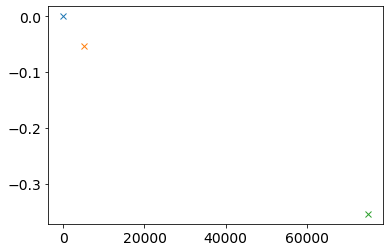

In [6]:
#5
plt.plot(   0,CalcVdem(fif,   0, v1, Qc, R3,R4,False),'x')
plt.plot( 5e3,CalcVdem(fif, 5e3, v1, Qc, R3,R4,False),'x')
plt.plot(75e3,CalcVdem(fif,75e3, v1, Qc, R3,R4,False),'x')
plt.show()



In [7]:
b = (Vdem5/5e3-Vdem75/57e3)/(5e3**2 - 75e3**2)
print(b)

a = Vdem5/5e3 - b * Vdem5**2 
print(a)


7.698879429046374e-16
-1.0518612929857205e-05


-9.346542792604627e-06 8.908972272042612e-16


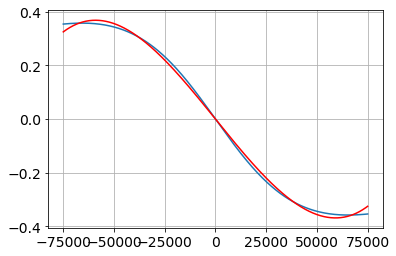

In [8]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x + b*x**3

xdata = np.linspace(-75e3, 75e3, 1e3)

ydata = [CalcVdem(fif, Df, v1, Qc, R3,R4,showme= False) for Df in xdata]

plt.plot(xdata,ydata)


popt, pcov = curve_fit(func, xdata, ydata)
print(*popt)
plt.plot(xdata, func(xdata, *popt), 'r-')
plt.grid()
plt.show()

#  6. Para la curva alineal hallada en 5 determinar la distorsión de la señal detectada supuesto que la moduladora es una senoide pura de audio que produce un $\Delta f = 75 KHz$


$THD = \frac{ \sum_{i=2}^{\inf}{V_n}}{V_1}$

Si la función tiene simetria par, los armanicos se calculan como:


$I_{d_a} = \frac{1}{n} \sum_{i=0}^{n} idc_1(\theta_m(i)) \cdot cos(\theta_m(i) \cdot a)$



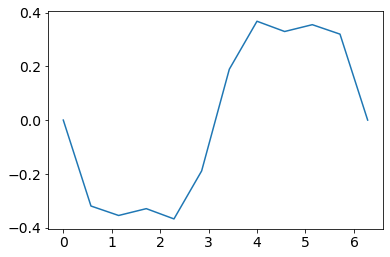

In [16]:
thi   = np.linspace(0, 2*np.pi, 24)
dft  = 75e3*np.sin(thi)
vdem = func(dft, *popt)


plt.plot(thi, vdem)
plt.show()




# 7. Supuesto que la FI entrega ruido de AM plano en la banda  $100 Hz \leq Ruido \leq 10 KHz$ determinar $C_5$ para minimizar el ruido de AM sin afectar las señales de audio recibidas, explicitando los criterios utilizados para su determinación.



# 8.  Se cambia la señal de entrada por otra modulada en PM con un $ \Delta  \phi =180^\circ{}$. Diseñar el circuito que a de conectarse a la salida (Borne $V_{dem}$) para recuperar una modulante de telefonía ($300 Hz \leq f_{mod} \leq 3 KHz$). La tensión recuperada deberá tener $1 V_{pico}$ para todas las frecuencias de audio posibles. El circuito debe ser analógico, para realizarlo se dispone de operacionales ideales, resistencias y capacitores en cantidad y valores que sean necesarios.